Mempersiapkan Dataset MNIST

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Transformasi data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Memuat dataset MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform)

# Membuat dataloader
batch_size = 64
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

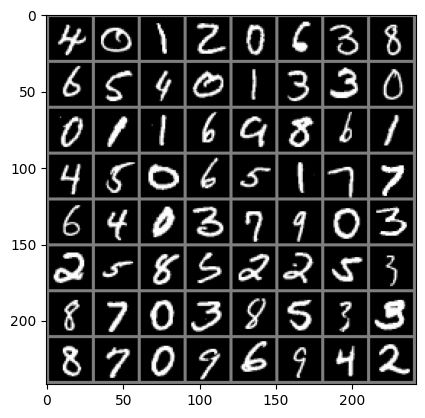

In [ ]:
# Fungsi untuk menampilkan gambar MNIST
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Menampilkan beberapa sampel gambar
dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))

Mendesain Model Jaringan Saraf

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model
input_size = 28 * 28  # MNIST image size is 28x28
hidden_size = 128
num_classes = 10
model = SimpleNN(input_size, hidden_size, num_classes)

Menetapkan Hyperparameter, Fungsi Loss, dan Optimizer

In [ ]:
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Membangun Loop Pelatihan dan Melatih Model

In [ ]:
num_epochs = 5

for epoch in range(num_epochs):
    total_loss = 0
    for images, labels in train_loader:
        images = images.view(-1, 28 * 28)  # Flatten the images
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}")

Epoch 1, Loss: 0.3859565516095807
Epoch 2, Loss: 0.20463154703648742
Epoch 3, Loss: 0.1466732595894319
Epoch 4, Loss: 0.11863835937262121
Epoch 5, Loss: 0.0990398540687777


Evaluasi Model

In [ ]:
correct = 0
total = 0
model.eval()

with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 28 * 28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Akurasi pada gambar uji: {:.2f}%'.format(100 * correct / total))

Akurasi pada gambar uji: 96.97%


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Fungsi untuk mendapatkan prediksi dari model
def get_all_predictions(model, data_loader):
    all_preds = []
    all_labels = []
    model.eval()
    with torch.no_grad():
        for images, labels in data_loader:
            images = images.view(-1, 28 * 28)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            all_preds.extend(predicted)
            all_labels.extend(labels)
    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)
    return all_preds, all_labels

# Mendapatkan prediksi dari model pada data uji
predictions, true_labels = get_all_predictions(model, test_loader)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predictions)
print('Akurasi: {:.2f}%'.format(accuracy * 100))

# Membuat matriks kebingungan
conf_matrix = confusion_matrix(true_labels, predictions)
print('Confusion Matrix:')
print(conf_matrix)

# Menghitung F1 Score, presisi, dan recall
report = classification_report(true_labels, predictions, target_names=[str(i) for i in range(10)])
print('Laporan Klasifikasi:')
print(report)

Akurasi: 96.97%
Confusion Matrix:
[[ 969    0    1    1    1    4    1    1    1    1]
 [   0 1129    1    2    0    1    1    0    1    0]
 [   7    8  989    4    5    0    4   10    5    0]
 [   0    1    5  981    1    4    0    6    4    8]
 [   0    1    2    1  952    3    4    2    2   15]
 [   3    1    0    9    2  861    6    1    4    5]
 [   6    5    1    1    7    6  928    1    3    0]
 [   2   14    7    6    2    1    0  986    0   10]
 [   3    2    5    4    8   10    2    5  930    5]
 [   6    5    0    4   14    3    1    4    0  972]]
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.96      0.97      0.96       982
           5       0.96      0.97      0.96       892
           6       0.98      0.97  